# Mini Project - Group K

---

##### **Data Analyst 1:** Wang Ciyun &emsp;&emsp;&emsp;&nbsp; **Metric Number:** U2120384D
##### **Data Analyst 2:** Zhang Yuxuan &emsp;&emsp; **Metric Number:** U2120484A

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Problem : Predicting HeartDisease using BMI, Smoking, AlcoholDrinking, MentalHealth, AgeCategory, GenHealth and SleepTime

Dataset from Kaggle : **"Personal Key Indicators of Heart Disease"**     
Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Our Goal is to create a accurate Decision Tree to determine their risk of having HeartDisease based on their personal habits.
Since we are more focused on predicting the heart disease for Race Asian, we have filtered the dataset and make it more suitable for our problem.

The dataset is `heartdisease.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
hdData = pd.read_csv('heartdisease.csv')
hdData.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,40.00,No,No,No,0,0,No,Male,60-64,Asian,Yes,No,Good,6,No,No,No
1,No,17.71,No,No,No,0,10,No,Female,65-69,Asian,No,Yes,Good,6,No,No,No
2,No,25.80,No,No,No,0,0,No,Male,50-54,Asian,No,No,Very good,7,No,No,No
3,No,25.61,No,No,No,0,0,No,Female,60-64,Asian,Yes,Yes,Good,7,No,No,No
4,Yes,20.36,No,No,No,10,0,Yes,Male,70-74,Asian,No,No,Fair,5,Yes,No,No


In [3]:
hdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      8068 non-null   object 
 1   BMI               8068 non-null   float64
 2   Smoking           8068 non-null   object 
 3   AlcoholDrinking   8068 non-null   object 
 4   Stroke            8068 non-null   object 
 5   PhysicalHealth    8068 non-null   int64  
 6   MentalHealth      8068 non-null   int64  
 7   DiffWalking       8068 non-null   object 
 8   Sex               8068 non-null   object 
 9   AgeCategory       8068 non-null   object 
 10  Race              8068 non-null   object 
 11  Diabetic          8068 non-null   object 
 12  PhysicalActivity  8068 non-null   object 
 13  GenHealth         8068 non-null   object 
 14  SleepTime         8068 non-null   int64  
 15  Asthma            8068 non-null   object 
 16  KidneyDisease     8068 non-null   object 


<br>**Let's list down all our observations from the super-quick glance of the dataset, as above.**
* There are `18` variables/features/columns and `8068` observations/samples/rows in the dataset.    
* The response variable seems to be `HeartDisease`, while the remaining 17 are most likely predictors.     
* There are `3` variables identified as `int64` and `1` variable as `float64` by default, and it seems they are indeed Numeric.     
* There are `14` variables identified as `object` by default, and they are most likely Categorical.      
* None of the variables/features seem to have any missing value (have to check again, carefully).
<br>

In this problem, since we are only focusing on personal habits, we have filted out some variables that is unable to control by personal behaviour. we will analyze the following variables in the dataset and their relationship with HeartDisease.    
`['BMI', 'Smoking', 'AlcoholDrinking', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SleepTime']`

---
## Exploratory Data Analysis

Let us start by exploring the response variable `HeartDisease`, the one we are supposed to predict for the problem.

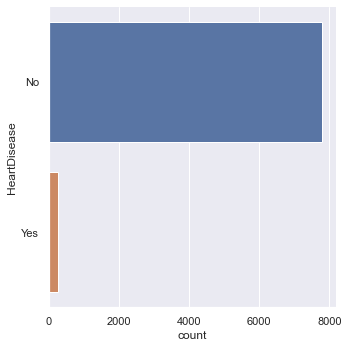

In [4]:
sb.catplot(y = 'HeartDisease', data = hdData, kind = "count")

In [5]:
countG, countB = hdData['HeartDisease'].value_counts()
print("Ratio of Having HeartDisease No : Yes = ", countG, ":", countB)

Ratio of Having HeartDisease No : Yes =  7802 : 266


There is a large class imbalance in the Response variable.     
we fix this later for creating Classification models.  
Next, we will analyse separately for both **Numeric** and **Categorical** predictors that we are going to use, as the standard functions behave differently for them.

In [6]:
# Numeric Predictors
hdData[['BMI','PhysicalHealth','MentalHealth','SleepTime']].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,8068.000000,8068.000000,8068.000000,8068.000000
mean,25.218303,1.630640,2.755454,6.918691
std,4.876441,5.434753,6.481702,1.297109
min,12.830000,0.000000,0.000000,1.000000
25%,21.950000,0.000000,0.000000,6.000000
50%,24.560000,0.000000,0.000000,7.000000
75%,27.460000,0.000000,2.000000,8.000000
max,83.330000,30.000000,30.000000,20.000000


In [7]:
# Categorical Predictors
hdData[['Smoking','AlcoholDrinking','AgeCategory','GenHealth']].describe()

,Smoking,AlcoholDrinking,AgeCategory,GenHealth
count,8068,8068,8068,8068
unique,2,2,13,5
top,No,No,18-24,Very good
freq,6229,7800,1148,2798


Based on the observations from the data, we have the info for the variables and their values/ranges.   
* BMI seems to be in a overweight range, as the mean is around 25, while the min and max are 12 and 83.    
* PhysicalHealth seems to describe the physical illness and injury for how many days during the past 30, observed from the distribution.      
* MentalHealth seems to describe the non-good mental health for how many days during the past 30 days, observed from the distribution.      
* SleepTime seems to be normal as the mean is around 7, the recommended sleep hours per day is 7-8 hours.    
* Smoking has 2 levels, most likely Yes (smoking) and No (no smoking), with the majority (6229) being no smoking.     
* AlcoholDrinking has 2 levels, most likely Yes (drinking) and No (no drinking), with the majority (7800) being no drinking.      
* AgeCategory has 13 levels, with the majority (1148) fall in 18-24 age range.      
* GenHealth has 5 levels, with the majority (2798) has a very good gen.

Next, to help us gain a better insights. we will perform some visualizations to check the distribution of both Numeric and Categorical predictor variables.

---
### Numeric Predictors corresponding to the HeartDisease

<AxesSubplot:>

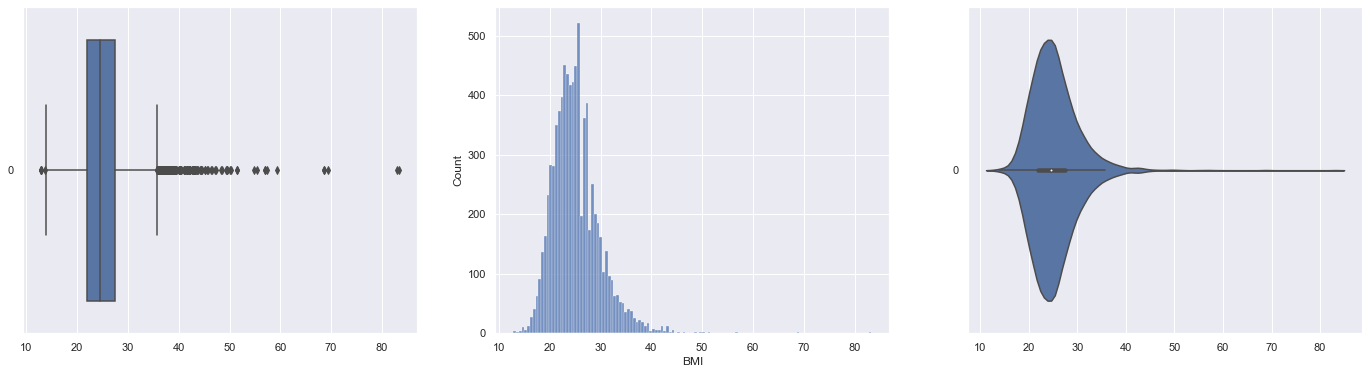

In [8]:
# Numeric Predictor - BMI
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = hdData['BMI'], orient = "h", ax = axes[0])
sb.histplot(data = hdData['BMI'], ax = axes[1])
sb.violinplot(data = hdData['BMI'], orient = "h", ax = axes[2])

Based on the observation, BMI has the median of around 25, with 75% of the data in the range of 22 to 27.5.

<AxesSubplot:>

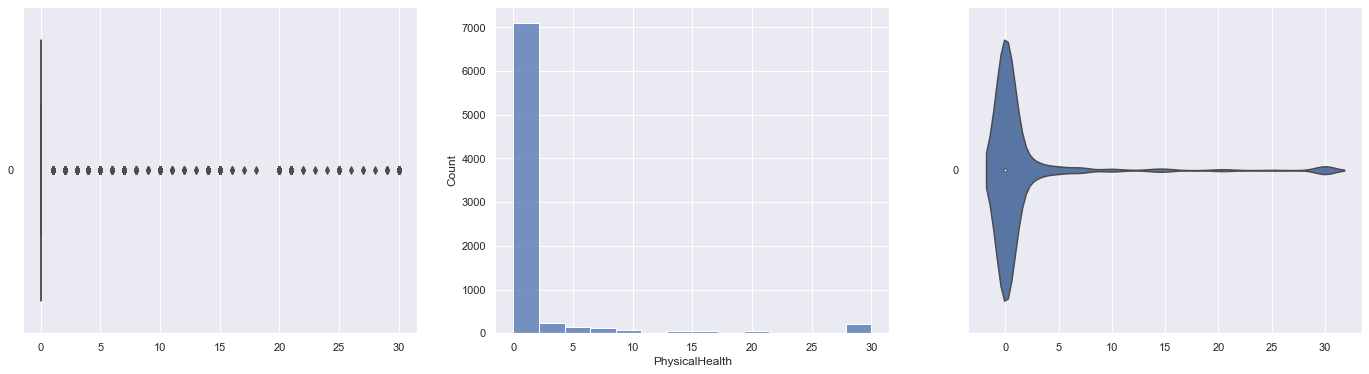

In [9]:
# Numeric Predictor - PhysicalHealth
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = hdData['PhysicalHealth'], orient = "h", ax = axes[0])
sb.histplot(data = hdData['PhysicalHealth'], ax = axes[1])
sb.violinplot(data = hdData['PhysicalHealth'], orient = "h", ax = axes[2])

Based on the observation, the distribution of data for PhysicalHealth is very uneven. More than 90% data has 0 day with physical illness and injury for the past 30 days.

<AxesSubplot:>

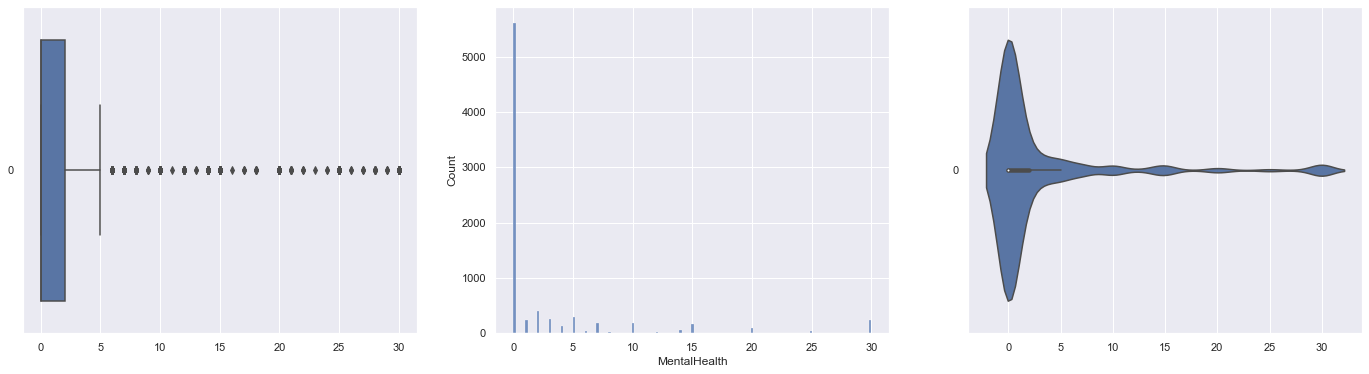

In [10]:
# Numeric Predictor - MentalHealth
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = hdData['MentalHealth'], orient = "h", ax = axes[0])
sb.histplot(data = hdData['MentalHealth'], ax = axes[1])
sb.violinplot(data = hdData['MentalHealth'], orient = "h", ax = axes[2])

Based on the observation, the distrubution of data for MentalHealth is also very uneven. More than 5500 data has 0 day with non-good mental health for the past 30 days.

<AxesSubplot:>

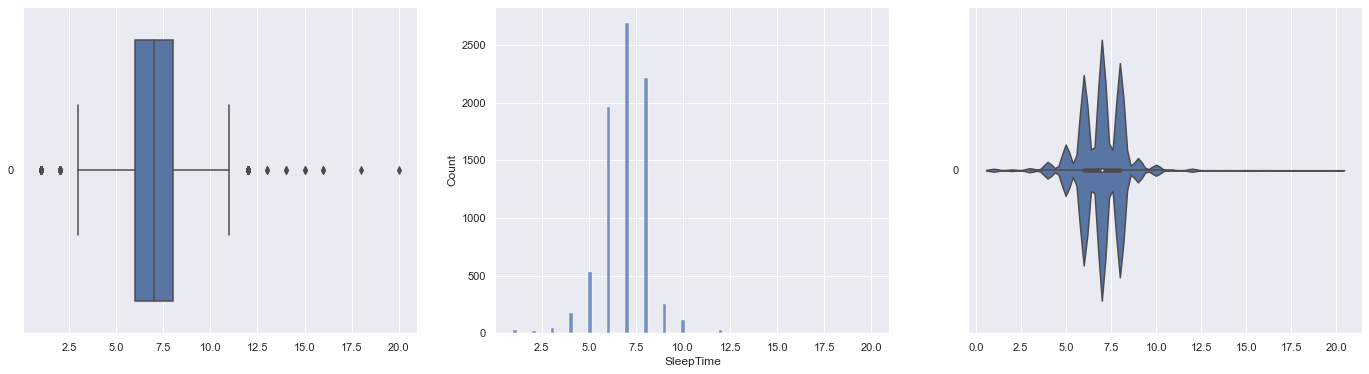

In [11]:
# Numeric Predictor - SleepTime
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = hdData['SleepTime'], orient = "h", ax = axes[0])
sb.histplot(data = hdData['SleepTime'], ax = axes[1])
sb.violinplot(data = hdData['SleepTime'], orient = "h", ax = axes[2])

Based on the observation, SleepTime has the median of around 7 hours, with 75% of the data in the range of 6 to 8 hours.

### Categorical Predictors corresponding to the HeartDisease

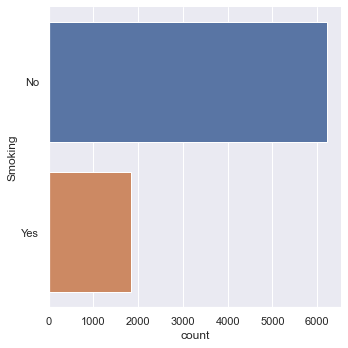

In [12]:
# Categorical Predictor - Smoking
sb.catplot(y = 'Smoking', data = hdData, kind = "count")

Over the total data counts, there is about 25% is Yes for Smoking and the Rest is No for Smoking. The distribution of data between the two categories is fairly reasonable.

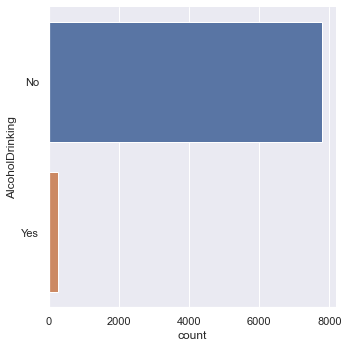

In [13]:
# Categorical Predictor - AlcoholDrinking
sb.catplot(y = 'AlcoholDrinking', data = hdData, kind = "count")

Over the total data counts, there is about 200 data entries is Yes for AlcoholDrinking and the Rest is No for Smoking. The distribution of data between the two categories is quit unreasonable.

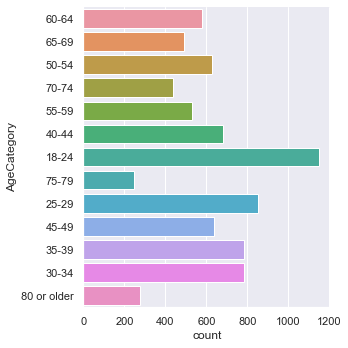

In [14]:
# Categorical Predictor - AgeCategory
sb.catplot(y = 'AgeCategory', data = hdData, kind = "count")

The total data counts is quit evenly distributed amoung the 13 AgeCategories, starting from 18-24 until 80 or older. Age group 75 - 79 and 80 or older has a sligly lesser samples and 18 - 24 age group has slighly more samples.

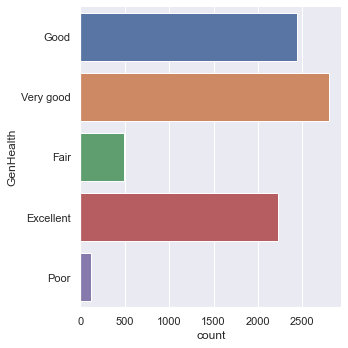

In [15]:
# Categorical Predictor - GenHealth
sb.catplot(y = 'GenHealth', data = hdData, kind = "count")

Over the total data counts, about 90% of data sample is evenly distributed amoung the three categories Good, Very good and Excellent. And the rest of data is in category Fair and Poor which is much lesser compared to the other data counts.

---
### Relationship with HeartDisease

After analyzing each predictor variables. We will look into their relationship with HeartDisease and determine the usefulness of each variables to create a decision tree.

<AxesSubplot:xlabel='BMI', ylabel='HeartDisease'>

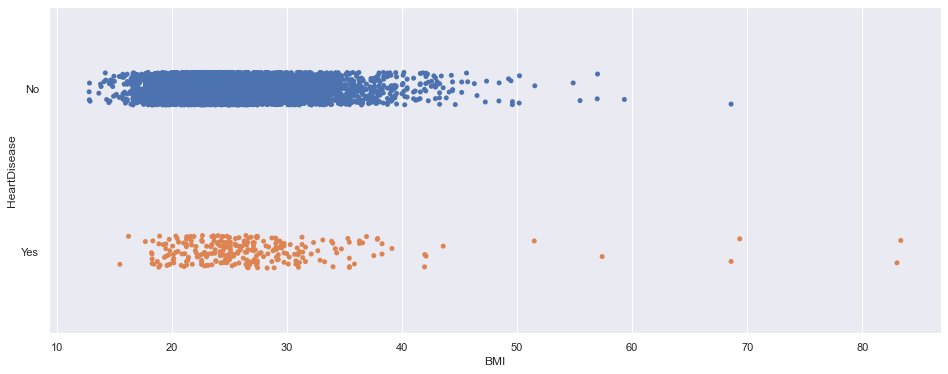

In [16]:
# Numeric Predictor - BMI vs HeartDisease
f = plt.figure(figsize=(16, 6))
sb.stripplot(x = 'BMI', y = 'HeartDisease', data = hdData)

From observation, most of the Yes entries for HeartDisease falls within the range around 18 to 38 for BMI, which is accurate to say that if BMI is not in this range, most likely that the HeartDisease value will be No. Therefore it will be a useful predictor for the decision tree.

<AxesSubplot:xlabel='PhysicalHealth', ylabel='HeartDisease'>

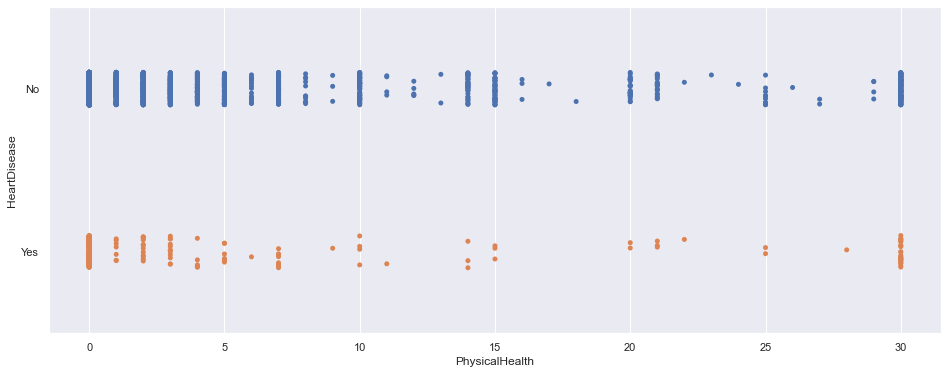

In [17]:
# Numeric Predictor - PhysicalHealth vs HeartDisease
f = plt.figure(figsize=(16, 6))
sb.stripplot(x = 'PhysicalHealth', y = 'HeartDisease', data = hdData)

From observation, Yes entries for HeartDisease falls within the entire range for PhysicalHealth, also from the variable analysis previously. The large uneven amount of distribution data located at value 0 for PhysicalHealth, which make it hard to predict the value of Heartdisease. Therefore it will not be a useful predictor for the decision tree.

<AxesSubplot:xlabel='MentalHealth', ylabel='HeartDisease'>

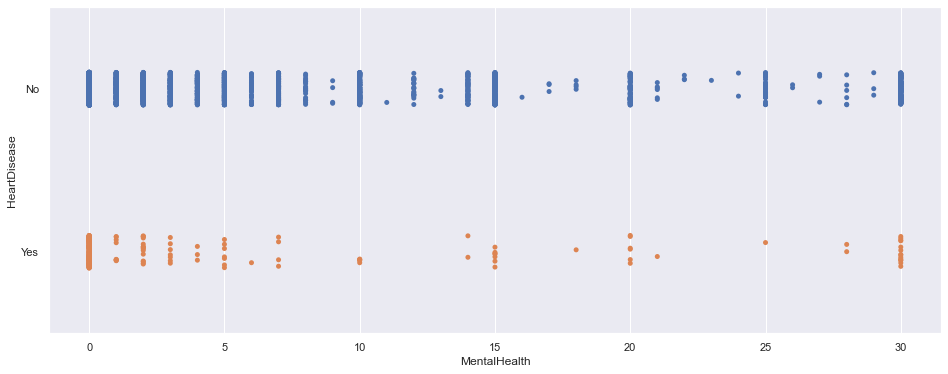

In [18]:
# Numeric Predictor - MentalHealth vs HeartDisease
f = plt.figure(figsize=(16, 6))
sb.stripplot(x = 'MentalHealth', y = 'HeartDisease', data = hdData)

From observation, Yes entries for HeartDisease falls within the entire range for MentalHealth, also from the variable analysis previously. The large uneven amount of distribution data located at value 0 for MentalHealth.Which make it hard to predict the value of Heartdisease. Therefore it will not be a useful predictor for the decision tree.

<AxesSubplot:xlabel='SleepTime', ylabel='HeartDisease'>

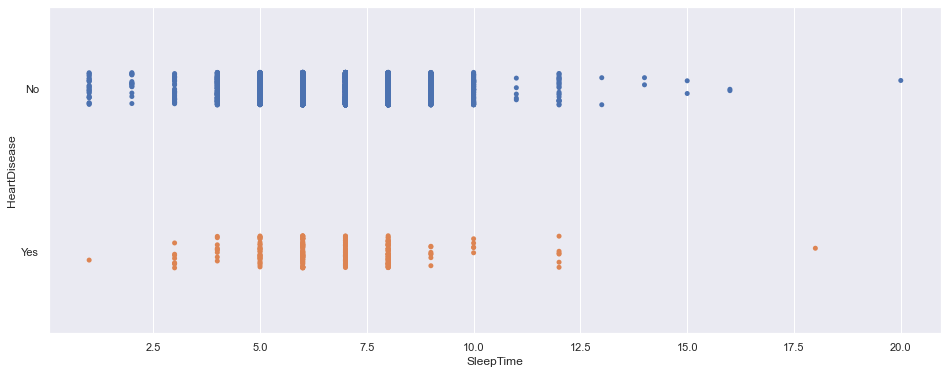

In [19]:
# Numeric Predictor - SleepTime vs HeartDisease
f = plt.figure(figsize=(16, 6))
sb.stripplot(x = 'SleepTime', y = 'HeartDisease', data = hdData)

From observation, most of the Yes entries for HeartDisease falls within the range around 4 to 10 for SleepTime, which is accurate to say that if SleepTime is not in this range, most likely that the HeartDisease value will be No. Therefore it will be a useful predictor for the decision tree.

<AxesSubplot:xlabel='Smoking', ylabel='HeartDisease'>

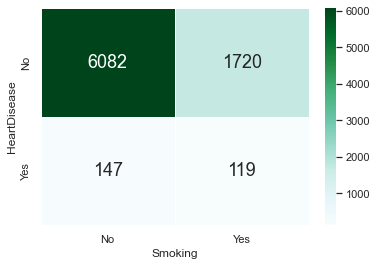

In [20]:
# Categorical Predictor - Smoking vs HeartDisease
f = plt.figure(figsize=(6, 4))
sb.heatmap(hdData.groupby(['HeartDisease', 'Smoking']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

From observation, the entries ratio for HeartDisease when smoking is no is about 40:1 and 15:1 when smoking is yes, which is fair to say that if Smoking is No, most likely that the HeartDisease value will be No. It may not be equally obvious when Smoking is Yes as the ratio is only 15:1. However it is still a fairly useful predictor for the decision tree.

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='HeartDisease'>

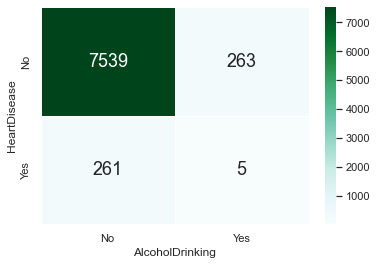

In [21]:
# Categorical Predictor - AlcoholDrinking vs HeartDisease
f = plt.figure(figsize=(6, 4))
sb.heatmap(hdData.groupby(['HeartDisease', 'AlcoholDrinking']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

From observation, the entries ratio for HeartDisease when AlcoholDrinking is no is about 35:1 and 50:1 when smoking is yes, which is fair to say that if AlcoholDrinking is No, most likely that the HeartDisease value will be No. And if AlcoholDrinking is Yes, most likely that the HeartDisease value will be No. Therefore it is quit a useful predictor for the decision tree.

<AxesSubplot:xlabel='AgeCategory', ylabel='HeartDisease'>

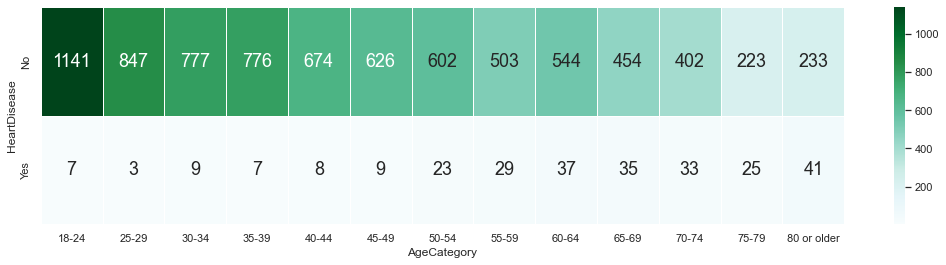

In [22]:
# Categorical Predictor - AgeCategory vs HeartDisease
f = plt.figure(figsize=(18, 4))
sb.heatmap(hdData.groupby(['HeartDisease', 'AgeCategory']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

From observation, the entries ratio for HeartDisease for each AgeCategory is big from AgeCategory 18-24 to 45-49. The ratio is slightly decrease within the range 50-54 to 70-74 and even lower for range 75-79. The number of yes for Heartdisease is increase when going up the AgeCategory. Therefore it is quit a useful predictor for the decision tree.

<AxesSubplot:xlabel='GenHealth', ylabel='HeartDisease'>

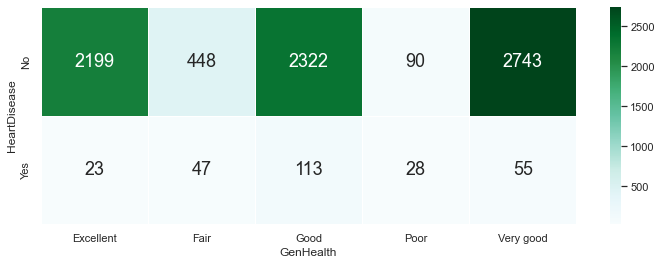

In [23]:
# Categorical Predictor - GenHealth vs HeartDisease
f = plt.figure(figsize=(12, 4))
sb.heatmap(hdData.groupby(['HeartDisease', 'GenHealth']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

From observation, the entries ratio for HeartDisease when GenHealth is Excellent, good and very good is very outstanding. Its is very likely to say that if GenHealth is in these categories, most likely they have no HeartDisease. Therefore it is quit a useful predictor for the decision tree.
<br>
<br>
##### **After analyzing the data, we found that there are `6` useful variables that can be used to predit HeartDisease, as follow:**    
##### **`['BMI', 'Smoking', 'AlcoholDrinking', 'AgeCategory', 'GenHealth', 'SleepTime']`**
<br>

---
### Complex Relationships with HeartDisease

We will explore slightly more on complex bi-variate relationships of predictors with HeartDisease, and see if we can further more understand the variables.

<AxesSubplot:xlabel='SleepTime', ylabel='BMI'>

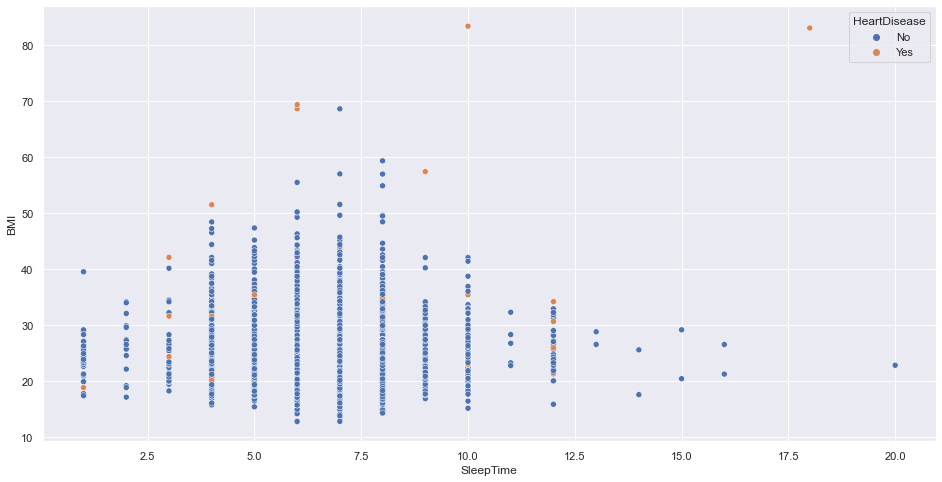

In [24]:
# HeartDisease vs BMI and SleepTime
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = 'SleepTime', y = 'BMI', hue = 'HeartDisease', data = hdData)

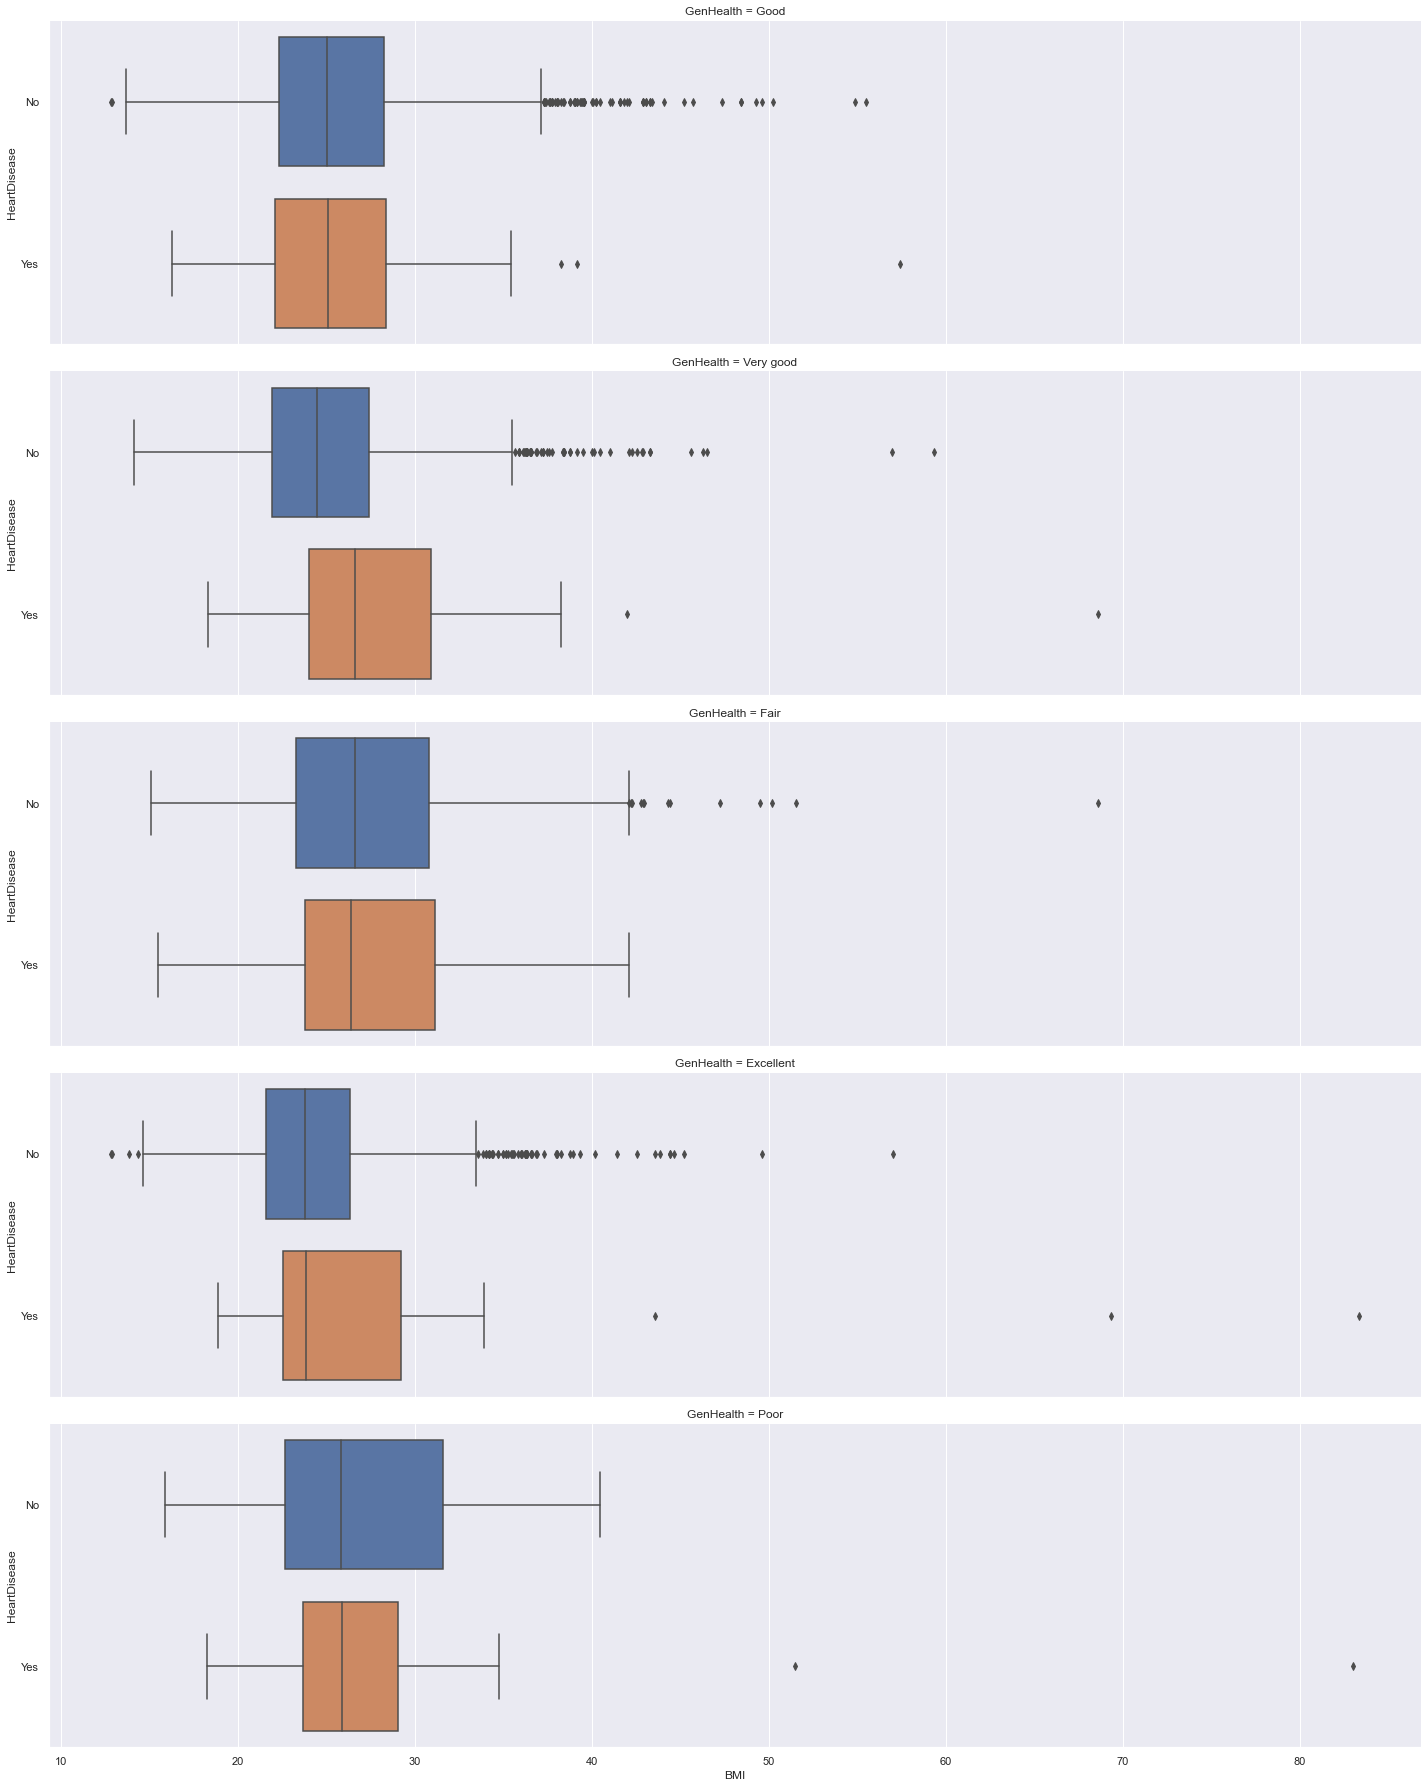

In [25]:
# HeartDisease vs BMI and GenHealth
sb.catplot(x = 'BMI', y = 'HeartDisease', row = 'GenHealth', data = hdData, kind = 'box', aspect = 4)

---

## Creating a Model for Rating : Attempt 1

We create a multi-variate Classification Tree with 6 useful predictors `BMI`, `Smoking`, `AlcoholDrinking`, `AgeCategory`, `GenHealth`, `SleepTime` and `HeartDisease` as response.     

Since `DecisionTreeClassifier` in `sklearn` does not handle categorical variables directly as a part of the current implementation, we will firstly encode the categorical variables using the `OneHotEncoder` from `sklearn`.

In [64]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
hdData_cat = hdData[['Smoking','AlcoholDrinking','AgeCategory','GenHealth']]
ohe.fit(hdData_cat)
hdData_cat_ohe = pd.DataFrame(ohe.transform(hdData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(hdData_cat.columns))

# Check the encoded variables
hdData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Smoking_No               8068 non-null   float64
 1   Smoking_Yes              8068 non-null   float64
 2   AlcoholDrinking_No       8068 non-null   float64
 3   AlcoholDrinking_Yes      8068 non-null   float64
 4   AgeCategory_18-24        8068 non-null   float64
 5   AgeCategory_25-29        8068 non-null   float64
 6   AgeCategory_30-34        8068 non-null   float64
 7   AgeCategory_35-39        8068 non-null   float64
 8   AgeCategory_40-44        8068 non-null   float64
 9   AgeCategory_45-49        8068 non-null   float64
 10  AgeCategory_50-54        8068 non-null   float64
 11  AgeCategory_55-59        8068 non-null   float64
 12  AgeCategory_60-64        8068 non-null   float64
 13  AgeCategory_65-69        8068 non-null   float64
 14  AgeCategory_70-74       

In [65]:
# Combining Numeric features with the OHE Categorical features
hdData_num = hdData[['BMI','SleepTime']]
hdData_res = hdData['HeartDisease']
hdData_ohe = pd.concat([hdData_num, hdData_cat_ohe, hdData_res], 
                           sort = False, axis = 1).reindex(index=hdData_num.index)

# Check the final dataframe
hdData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BMI                      8068 non-null   float64
 1   SleepTime                8068 non-null   int64  
 2   Smoking_No               8068 non-null   float64
 3   Smoking_Yes              8068 non-null   float64
 4   AlcoholDrinking_No       8068 non-null   float64
 5   AlcoholDrinking_Yes      8068 non-null   float64
 6   AgeCategory_18-24        8068 non-null   float64
 7   AgeCategory_25-29        8068 non-null   float64
 8   AgeCategory_30-34        8068 non-null   float64
 9   AgeCategory_35-39        8068 non-null   float64
 10  AgeCategory_40-44        8068 non-null   float64
 11  AgeCategory_45-49        8068 non-null   float64
 12  AgeCategory_50-54        8068 non-null   float64
 13  AgeCategory_55-59        8068 non-null   float64
 14  AgeCategory_60-64       

### Create and Fit the Model

After the encoding is done, we can create and fit the `DecisionTreeClassifier` model on the dataset.

[Text(0.5576923076923077, 0.9, 'GenHealth_Poor <= 0.5\ngini = 0.06\nsamples = 5647\nvalue = [5472, 175]\nclass = NoHeartDisease'),
 Text(0.3076923076923077, 0.7, 'GenHealth_Fair <= 0.5\ngini = 0.055\nsamples = 5568\nvalue = [5409, 159]\nclass = NoHeartDisease'),
 Text(0.15384615384615385, 0.5, 'AgeCategory_80 or older <= 0.5\ngini = 0.046\nsamples = 5220\nvalue = [5097, 123]\nclass = NoHeartDisease'),
 Text(0.07692307692307693, 0.3, 'GenHealth_Good <= 0.5\ngini = 0.041\nsamples = 5068\nvalue = [4961, 107]\nclass = NoHeartDisease'),
 Text(0.038461538461538464, 0.1, 'gini = 0.027\nsamples = 3429\nvalue = [3382, 47]\nclass = NoHeartDisease'),
 Text(0.11538461538461539, 0.1, 'gini = 0.071\nsamples = 1639\nvalue = [1579, 60]\nclass = NoHeartDisease'),
 Text(0.23076923076923078, 0.3, 'BMI <= 38.365\ngini = 0.188\nsamples = 152\nvalue = [136, 16]\nclass = NoHeartDisease'),
 Text(0.19230769230769232, 0.1, 'gini = 0.169\nsamples = 150\nvalue = [136, 14]\nclass = NoHeartDisease'),
 Text(0.269230

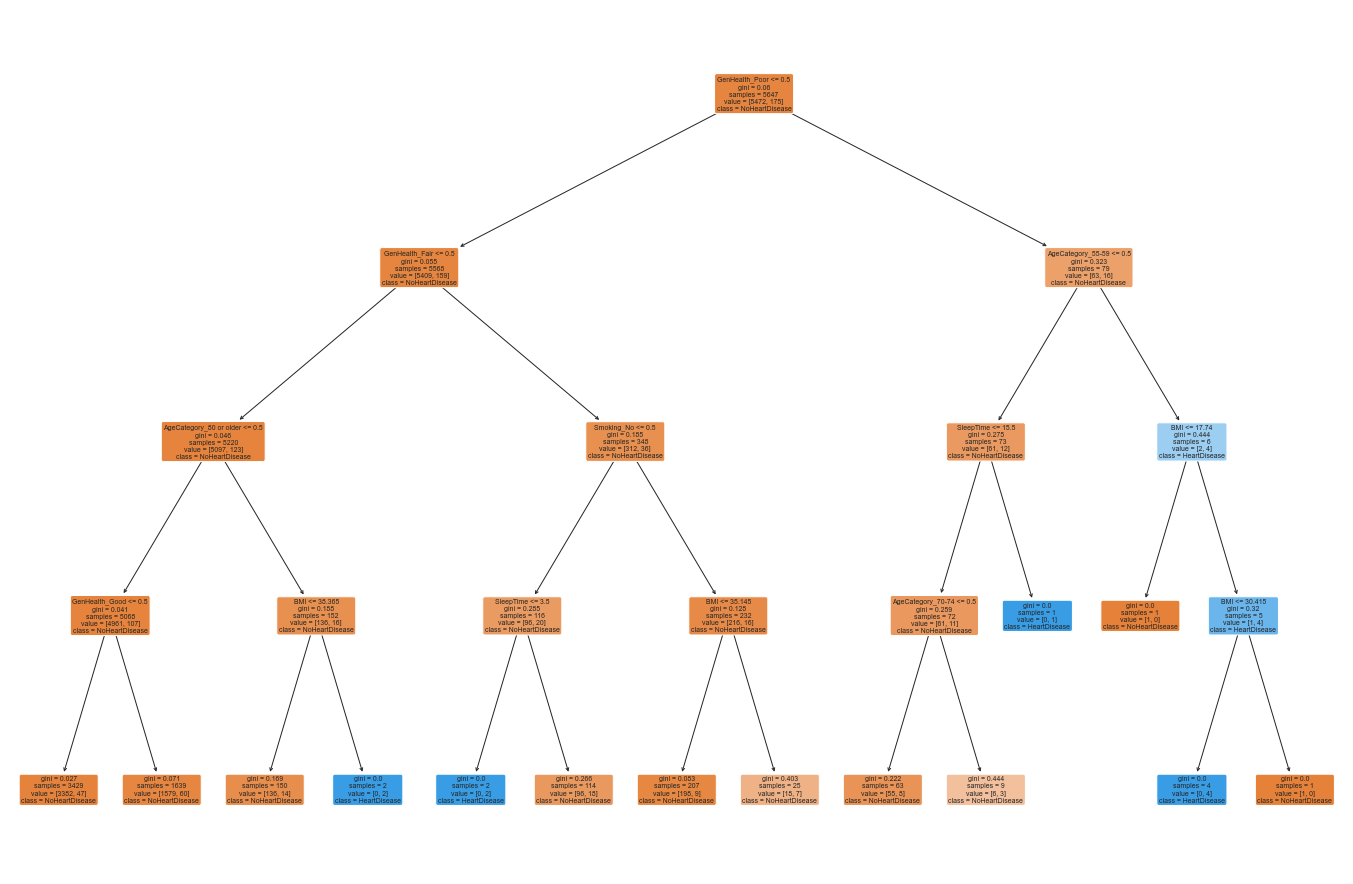

In [66]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(hdData_ohe['HeartDisease'])
X = pd.DataFrame(hdData_ohe.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # set max_depth as 4
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,16))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["NoHeartDisease","HeartDisease"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Train Data
Accuracy  :	 0.9706038604568797

TPR Train :	 0.05142857142857143
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.9485714285714286


<AxesSubplot:>

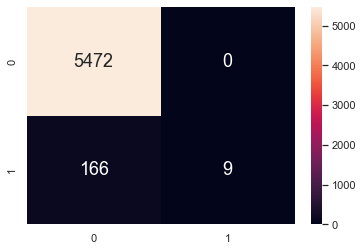

In [68]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9628252788104089

TPR Test :	 0.03296703296703297
TNR Test :	 0.9991416309012876

FPR Test :	 0.0008583690987124463
FNR Test :	 0.967032967032967


<AxesSubplot:>

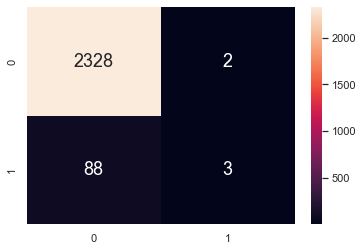

In [69]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Based on the observation, The Accuracy of this Classification for both Train and Test in very high, however this might due to the highly unbalance amount of the Response variable, most result falls into **True Negative** and the counts of **True Positive** is very low. We also noticed that there is a huge imbalance in the **False Positives** and **False Negatives** in the confusion matrix. **False Positives** are much higher in number than **False Negatives** in both Train and Test data. This is a direct effect of the large `Yes` vs `No` class imbalance in the response variable `HeartDisease`. Therefore, even the **Accuracy** is high, it is only useful to determin the **True Negative** value, but not useful to determin the **True Positive** value. We will fix this issue by solving the unbalance response variable.

---

## Create a Model for Rating : Attempt 2

We will improve the previous model by balancing the classes of the response `HeartDisease` in the training data. Keeping the OneHotEncoding same as before.

In [77]:
# Upsample Yes to match No
from sklearn.utils import resample

hdYes = hdData_ohe[hdData_ohe.HeartDisease == 'Yes']
hdNo = hdData_ohe[hdData_ohe.HeartDisease == 'No']
 
# Upsample the Yes samples
hdYes_up = resample(hdYes, 
                    replace=True,               # sample with replacement
                    n_samples=hdNo.shape[0])    # to match number of No
 
# Combine the two classes back after upsampling
hdData_ohe_up = pd.concat([hdNo, hdYes_up])
 
# Check the ratio of the classes
hdData_ohe_up['HeartDisease'].value_counts()

No     7802
Yes    7802
Name: HeartDisease, dtype: int64

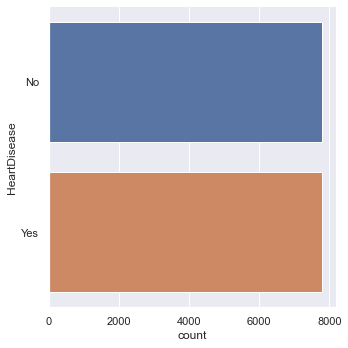

In [78]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'HeartDisease', data = hdData_ohe_up, kind = "count")

In [79]:
# Confirm that the OHE is still in place
# and that the samples have now increased
hdData_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15604 entries, 0 to 4681
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BMI                      15604 non-null  float64
 1   SleepTime                15604 non-null  int64  
 2   Smoking_No               15604 non-null  float64
 3   Smoking_Yes              15604 non-null  float64
 4   AlcoholDrinking_No       15604 non-null  float64
 5   AlcoholDrinking_Yes      15604 non-null  float64
 6   AgeCategory_18-24        15604 non-null  float64
 7   AgeCategory_25-29        15604 non-null  float64
 8   AgeCategory_30-34        15604 non-null  float64
 9   AgeCategory_35-39        15604 non-null  float64
 10  AgeCategory_40-44        15604 non-null  float64
 11  AgeCategory_45-49        15604 non-null  float64
 12  AgeCategory_50-54        15604 non-null  float64
 13  AgeCategory_55-59        15604 non-null  float64
 14  AgeCategory_60-64      

### Create and Fit the Model

After the encoding and upsampling is done, we can create and fit the `DecisionTreeClassifier` model on the dataset.

[Text(0.5431034482758621, 0.9, 'GenHealth_Excellent <= 0.5\ngini = 0.5\nsamples = 10922\nvalue = [5478, 5444]\nclass = NoHeartDisease'),
 Text(0.27586206896551724, 0.7, 'GenHealth_Very good <= 0.5\ngini = 0.493\nsamples = 8938\nvalue = [3943, 4995]\nclass = HeartDisease'),
 Text(0.13793103448275862, 0.5, 'Smoking_Yes <= 0.5\ngini = 0.45\nsamples = 5912\nvalue = [2021, 3891]\nclass = HeartDisease'),
 Text(0.06896551724137931, 0.3, 'AgeCategory_40-44 <= 0.5\ngini = 0.489\nsamples = 3509\nvalue = [1491, 2018]\nclass = HeartDisease'),
 Text(0.034482758620689655, 0.1, 'gini = 0.482\nsamples = 3394\nvalue = [1376, 2018]\nclass = HeartDisease'),
 Text(0.10344827586206896, 0.1, 'gini = 0.0\nsamples = 115\nvalue = [115, 0]\nclass = NoHeartDisease'),
 Text(0.20689655172413793, 0.3, 'AgeCategory_35-39 <= 0.5\ngini = 0.344\nsamples = 2403\nvalue = [530, 1873]\nclass = HeartDisease'),
 Text(0.1724137931034483, 0.1, 'gini = 0.327\nsamples = 2359\nvalue = [486, 1873]\nclass = HeartDisease'),
 Text(0.

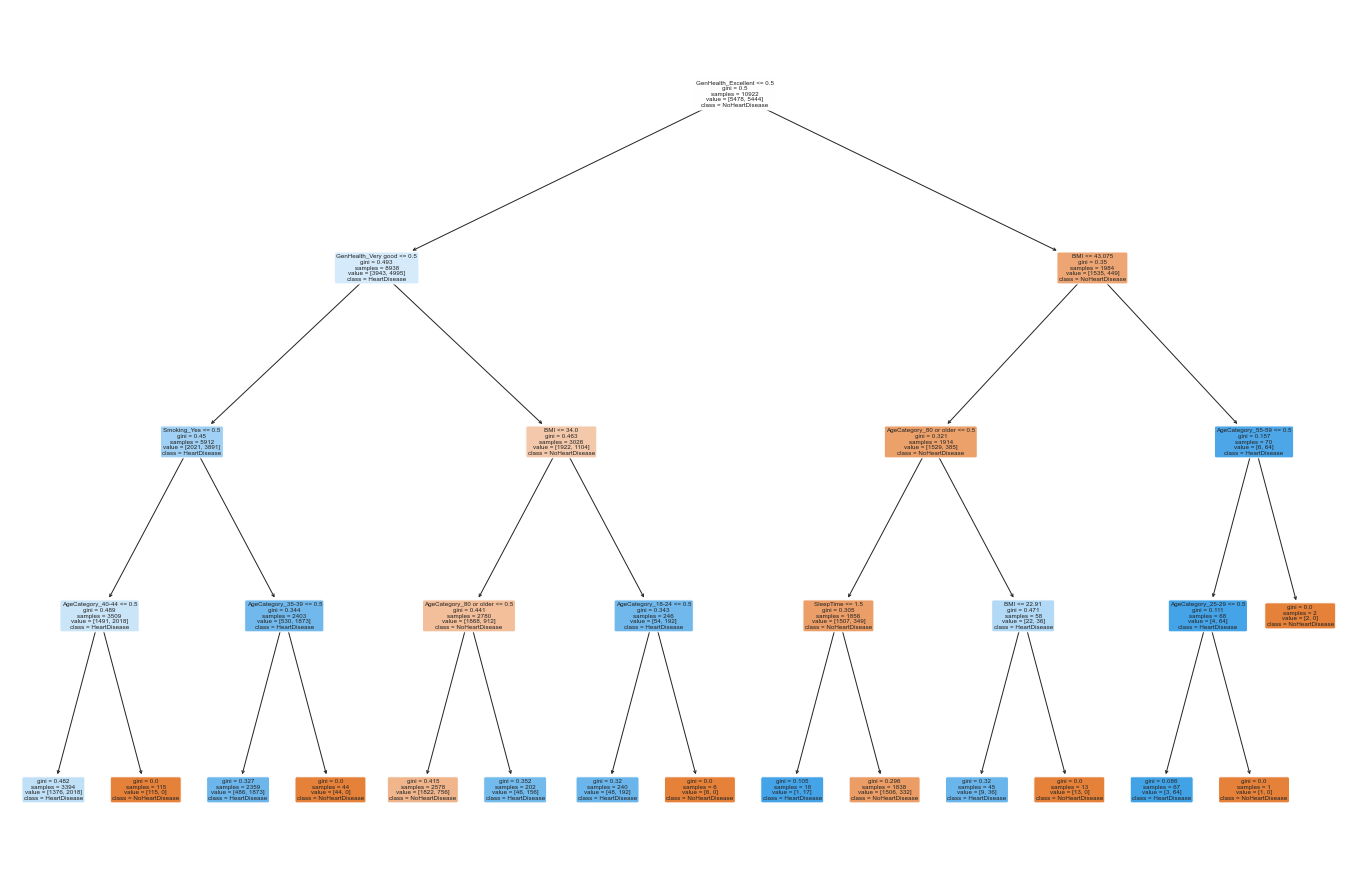

In [80]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(hdData_ohe_up['HeartDisease'])
X = pd.DataFrame(hdData_ohe_up.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # set max_depth as 4
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,16))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["NoHeartDisease","HeartDisease"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Train Data
Accuracy  :	 0.7201062076542758

TPR Train :	 0.8001469507714916
TNR Train :	 0.6405622489959839

FPR Train :	 0.35943775100401604
FNR Train :	 0.19985304922850844


<AxesSubplot:>

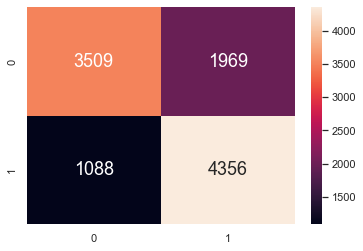

In [83]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7255446390431439

TPR Test :	 0.8023748939779474
TNR Test :	 0.6475903614457831

FPR Test :	 0.35240963855421686
FNR Test :	 0.19762510602205258


<AxesSubplot:>

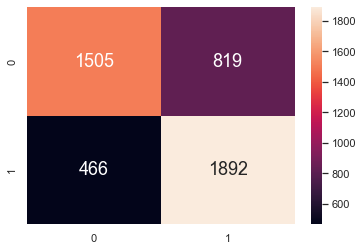

In [84]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

After Upsample, the value of **True Positive** is much higher and the **False Positives** and **False Negatives** are more balanced now. This shows that this classification is able to determin the **True Positive** value. However, the **Accuracy** dropped from around 0.973 to 0.719, we will make some improvement base on that.

---
## Create a Model for Rating : Attempt 3

After upsampling, the Decision Tree can be improved on its accuracy, we will apply another tree based classifier -- `RandomForest`, by keep the of upsampling and encoding from our previous attempts.

In [85]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(hdData_ohe_up['HeartDisease'])
X = pd.DataFrame(hdData_ohe_up.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [86]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HeartDisease.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.7472074711591283

TPR Train :	 0.7398493477861473
TNR Train :	 0.754517247672933

FPR Train :	 0.24548275232706698
FNR Train :	 0.26015065221385264


<AxesSubplot:>

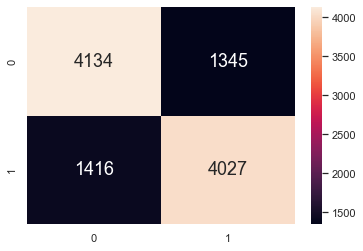

In [87]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7513882956001708

TPR Test :	 0.7465027554048326
TNR Test :	 0.7563495479982781

FPR Test :	 0.24365045200172192
FNR Test :	 0.2534972445951674


<AxesSubplot:>

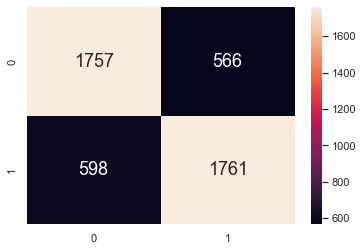

In [88]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Based on the observation, the accuracy slightly improved but it is still not doing too well after using `RandomForest`. Next we will going to adjust the two major parameters of Random Forest `n_estimators` (the number of decision trees in the forest) and `max_depth` (of each decision tree in the forest) and see if we can make some more improvements.


### Increase the Number of Decision Trees in the Forest

In [89]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(hdData_ohe_up['HeartDisease'])
X = pd.DataFrame(hdData_ohe_up.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 4)        # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HeartDisease.ravel())

RandomForestClassifier(max_depth=4, n_estimators=1000)

Train Data
Accuracy  :	 0.7613074528474638

TPR Train :	 0.7717171717171717
TNR Train :	 0.7509585539528939

FPR Train :	 0.24904144604710607
FNR Train :	 0.22828282828282828


<AxesSubplot:>

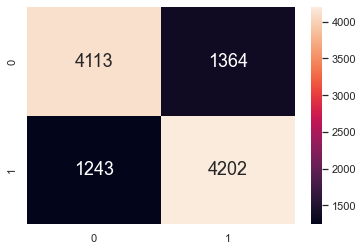

In [90]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7624946604015378

TPR Test :	 0.7840475180313958
TNR Test :	 0.7406451612903225

FPR Test :	 0.2593548387096774
FNR Test :	 0.21595248196860417


<AxesSubplot:>

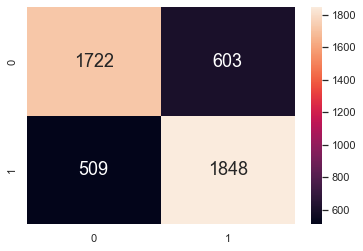

In [91]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Increase the Depth of Decision Trees in the Forest

In [92]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(hdData_ohe_up['HeartDisease'])
X = pd.DataFrame(hdData_ohe_up.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 10)      # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HeartDisease.ravel())

RandomForestClassifier(max_depth=10)

Train Data
Accuracy  :	 0.869163156930965

TPR Train :	 0.9024074074074074
TNR Train :	 0.8366533864541833

FPR Train :	 0.16334661354581673
FNR Train :	 0.09759259259259259


<AxesSubplot:>

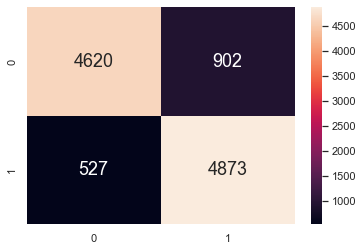

In [93]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8677915420760359

TPR Test :	 0.9079933388842631
TNR Test :	 0.8254385964912281

FPR Test :	 0.17456140350877192
FNR Test :	 0.09200666111573688


<AxesSubplot:>

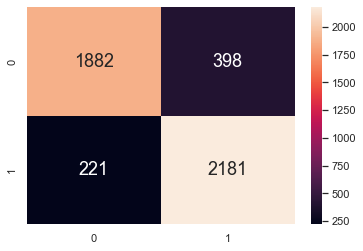

In [94]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Increase both Number and Depth of Decision Trees in the Forest

In [95]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(hdData_ohe_up['HeartDisease'])
X = pd.DataFrame(hdData_ohe_up.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HeartDisease.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.8686138069950559

TPR Train :	 0.9101576824349101
TNR Train :	 0.8271762984637894

FPR Train :	 0.17282370153621068
FNR Train :	 0.08984231756508984


<AxesSubplot:>

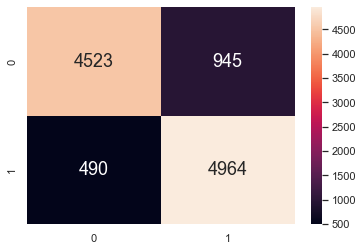

In [96]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8549765057667663

TPR Test :	 0.9024701873935264
TNR Test :	 0.8071979434447301

FPR Test :	 0.1928020565552699
FNR Test :	 0.0975298126064736


<AxesSubplot:>

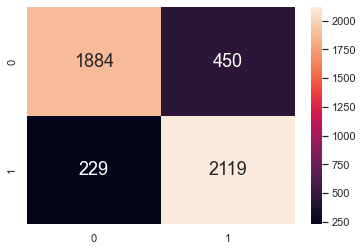

In [97]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Based on the observation, we noticed that with more number of trees and deeper trees in the forest, the accuracy of the Random Forest is getting better on both the train and test sets, but the gap between the performance on train and test is increasing too. This may be an indication of overfitting the train set. We will find the optimal hyper-parameters to maximize accuracy of the classifier on the test set in general. 

It is impossible to predict the generalized performance of the model from a single run. Thus, we will need to run this multiple times, with randomized train and test sets, to get a better estimate. We will achieve both targets by appling `Cross-Validation` techniques, whereby we can optimize the hyper-parameters of a model.

---
## Creating a Model for Rating : Attempt 4

We start to use a basic set of tools for Cross-Validation, so that we can tune the Hyper-parameters of Random Forest in this case.

In [99]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(hdData_ohe_up['HeartDisease'])
X = pd.DataFrame(hdData_ohe_up.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [100]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}              # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.HeartDisease.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [101]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=400)
0.8583590665627279


### Use the Best Model found through GridSearchCV

In [102]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(hdData_ohe_up['HeartDisease'])
X = pd.DataFrame(hdData_ohe_up.drop('HeartDisease', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 400,  # found using GridSearchCV
                                 max_depth = 10)      # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.HeartDisease.ravel())

RandomForestClassifier(max_depth=10, n_estimators=400)

Train Data
Accuracy  :	 0.8669657571873284

TPR Train :	 0.9097209556811964
TNR Train :	 0.8238646810075382

FPR Train :	 0.17613531899246185
FNR Train :	 0.09027904431880357


<AxesSubplot:>

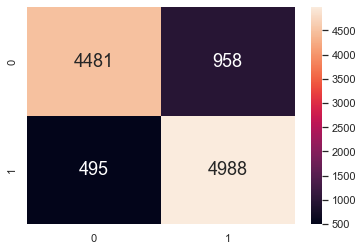

In [103]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8618111917983767

TPR Test :	 0.9133247089262613
TNR Test :	 0.81125687685146

FPR Test :	 0.18874312314854
FNR Test :	 0.08667529107373868


<AxesSubplot:>

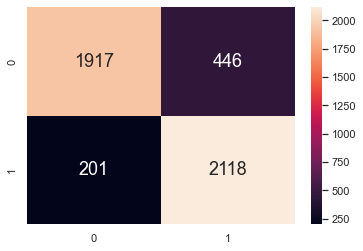

In [104]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Finally, we are done with our model building, with mutiple techniques applied, the final classification tree is both Accurate and usefull in predicting True Negative and True Positive. It will be a useful method to predit HeartDisease.